In [0]:
import gensim
import networkx as nx
import operator
import pprint

In [0]:
import urllib
urllib.request.urlretrieve("http://rusvectores.org/static/models/rusvectores2/ruscorpora_mystem_cbow_300_2_2015.bin.gz", "ruscorpora_mystem_cbow_300_2_2015.bin.gz")
m = 'ruscorpora_mystem_cbow_300_2_2015.bin.gz'
if m.endswith('.vec.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
elif m.endswith('.bin.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
else:
    model = gensim.models.KeyedVectors.load(m)

In [0]:
words = ['снег_S', 'дождь_S', 'ветер_S', 'солнце_S', 'туман_S', 'ливень_S','гром_S','буря_S','шторм_S','облако_S','гроза_S','туча_S','зной_S',
        'жара_S', 'духота_S', 'тайфун_S', 'ураган_S','морось_S','ясность_S', 'мороз_S', 'сырость_S','туман_S','погода_S']
word_graph = nx.Graph()

In [421]:
first_words=[]
all_words=[]
for word in words:
  if word in model:
    for i in model.most_similar(positive=word, topn=10):
      if i[1] >= 0.5 and i[0].endswith('_S'):
        first_words.append(i)
for f_word in first_words:
  print (f_word)
  word_graph.add_edge(word.split('_')[0], f_word[0].split('_')[0])
all_words.extend([w[0] for w in first_words])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


('сугроб_S', 0.7441344857215881)
('снежок_S', 0.6633657217025757)
('песок_S', 0.6073843836784363)
('наст_S', 0.5854066610336304)
('пороша_S', 0.5672221183776855)
('асфальт_S', 0.558459460735321)
('снежинка_S', 0.5483870506286621)
('наледь_S', 0.5472774505615234)
('лед_S', 0.5468866229057312)
('дождик_S', 0.817135214805603)
('ливень_S', 0.7384400367736816)
('дождичек_S', 0.681654691696167)
('морось_S', 0.5725617408752441)
('снегопад_S', 0.5722089409828186)
('ненастье_S', 0.5647642612457275)
('изморось_S', 0.5455604791641235)
('гроза_S', 0.5235806703567505)
('пурга_S', 0.5151122808456421)
('ветерок_S', 0.7609468698501587)
('сквозняк_S', 0.6451236009597778)
('вьюга_S', 0.6134116649627686)
('метель_S', 0.5785741806030273)
('пурга_S', 0.5717759132385254)
('ураган_S', 0.5594949126243591)
('бриз_S', 0.5537862777709961)
('шторм_S', 0.5513032674789429)
('сиверко_S', 0.5356917977333069)
('буря_S', 0.5345808267593384)
('луна_S', 0.7311291694641113)
('солнышко_S', 0.6957467794418335)
('закат_S', 0

In [422]:
second_words=[]
for word in all_words:
  if word in model:
    for i in model.most_similar(positive=word, topn=10):
      if i[1] >= 0.5 and i[0].endswith('_S'):
        second_words.append(i)
        print(i[0])
for f_word in second_words:
  print (f_word)
  word_graph.add_edge(word.split('_')[0], f_word[0].split('_')[0])
print(word_graph)
print('узлы', word_graph.nodes())
print('рёбра', word_graph.edges())
all_words.extend([w[0] for w in second_words])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


снег_S
наст_S
заструга_S
заструг_S
снежок_S
наледь_S
овраг_S
сумет_S
снег_S
снежинка_S
пороша_S
сугроб_S
песок_S
морозец_S
галька_S
щебень_S
гравий_S
песочек_S
глина_S
снег_S
опилки_S
асфальт_S
камень_S
щебенка_S
сугроб_S
снег_S
лед_S
надув_S
заструга_S
снег_S
снежок_S
мостовая_S
тротуар_S
брусчатка_S
песок_S
лужа_S
снег_S
булыжник_S
линолеум_S
грязь_S
паркет_S
снег_S
снежок_S
облачко_S
снег_S
сугроб_S
заструга_S
лед_S
льдина_S
снег_S
наст_S
ледок_S
наледь_S
дождь_S
дождичек_S
морось_S
ливень_S
дождь_S
гроза_S
ураган_S
снегопад_S
буря_S
шторм_S
дождик_S
пурга_S
шквал_S
проливень_S
дождик_S
дождь_S
изморось_S
морось_S
изморось_S
дождь_S
сырость_S
дождик_S
туман_S
метель_S
пурга_S
ливень_S
дождь_S
гроза_S
вьюга_S
непогода_S
буран_S
мороз_S
шторм_S
непогода_S
дождь_S
непогодь_S
гроза_S
пурга_S
ливень_S
морось_S
дождичек_S
дождь_S
изморозь_S
роса_S
ливень_S
буря_S
ураган_S
шторм_S
пурга_S
снегопад_S
непогода_S
гром_S
дождь_S
ненастье_S
метель_S
буран_S
вьюга_S
снегопад_S
шторм_S
буря_S
неп

In [423]:
print(word_graph.number_of_nodes())
print(word_graph.number_of_edges())

229
318


In [424]:
d_c = nx.degree_centrality(word_graph)
print (d_c)
d_c_max=max(d_c.items(), key=operator.itemgetter(1))[0]
print(d_c_max)

{'погода': 0.3991228070175438, 'сугроб': 0.008771929824561403, 'снежок': 0.008771929824561403, 'песок': 0.008771929824561403, 'наст': 0.008771929824561403, 'пороша': 0.008771929824561403, 'асфальт': 0.008771929824561403, 'снежинка': 0.008771929824561403, 'наледь': 0.008771929824561403, 'лед': 0.008771929824561403, 'дождик': 0.008771929824561403, 'ливень': 0.008771929824561403, 'дождичек': 0.008771929824561403, 'морось': 0.008771929824561403, 'снегопад': 0.008771929824561403, 'ненастье': 0.008771929824561403, 'изморось': 0.008771929824561403, 'гроза': 0.008771929824561403, 'пурга': 0.008771929824561403, 'ветерок': 0.008771929824561403, 'сквозняк': 0.008771929824561403, 'вьюга': 0.008771929824561403, 'метель': 0.008771929824561403, 'ураган': 0.008771929824561403, 'бриз': 0.008771929824561403, 'шторм': 0.008771929824561403, 'сиверко': 0.008771929824561403, 'буря': 0.008771929824561403, 'луна': 0.008771929824561403, 'солнышко': 0.008771929824561403, 'закат': 0.008771929824561403, 'звезда':

In [425]:
b_c = nx.betweenness_centrality(word_graph)
print (b_c)
b_c_max=max(b_c.items(), key=operator.itemgetter(1))[0]
print(b_c_max)

{'погода': 0.08443465491923641, 'сугроб': 0.0, 'снежок': 0.0, 'песок': 0.0, 'наст': 0.0, 'пороша': 0.0, 'асфальт': 0.0, 'снежинка': 0.0, 'наледь': 0.0, 'лед': 0.0, 'дождик': 0.0, 'ливень': 0.0, 'дождичек': 0.0, 'морось': 0.0, 'снегопад': 0.0, 'ненастье': 0.0, 'изморось': 0.0, 'гроза': 0.0, 'пурга': 0.0, 'ветерок': 0.0, 'сквозняк': 0.0, 'вьюга': 0.0, 'метель': 0.0, 'ураган': 0.0, 'бриз': 0.0, 'шторм': 0.0, 'сиверко': 0.0, 'буря': 0.0, 'луна': 0.0, 'солнышко': 0.0, 'закат': 0.0, 'звезда': 0.0, 'зной': 0.0, 'луч': 0.0, 'светило': 0.0, 'небо': 0.0, 'мгла': 0.0, 'пелена': 0.0, 'дымка': 0.0, 'облако': 0.0, 'сумрак': 0.0, 'марево': 0.0, 'туча': 0.0, 'муть': 0.0, 'сумерки': 0.0, 'мрак': 0.9174202024886002, 'дождь': 0.0, 'шквал': 0.0, 'проливень': 0.0, 'грохот': 0.0, 'раскат': 0.0, 'вихорь': 0.0, 'смерч': 0.0, 'непогода': 0.0, 'ветер': 0.0, 'качка': 0.0, 'облачко': 0.0, 'туман': 0.0, 'тучка': 0.0, 'наволочь': 0.0, 'гром': 0.0, 'хмарь': 0.0, 'жара': 0.0, 'духота': 0.0, 'стужа': 0.0, 'холод': 0.0

In [426]:
c_c = nx.closeness_centrality(word_graph)
print (c_c)
c_c_max=max(c_c.items(), key=operator.itemgetter(1))[0]
print(c_c_max)

{'погода': 0.6246575342465753, 'сугроб': 0.5022026431718062, 'снежок': 0.5022026431718062, 'песок': 0.5022026431718062, 'наст': 0.5022026431718062, 'пороша': 0.5022026431718062, 'асфальт': 0.5022026431718062, 'снежинка': 0.5022026431718062, 'наледь': 0.5022026431718062, 'лед': 0.5022026431718062, 'дождик': 0.5022026431718062, 'ливень': 0.5022026431718062, 'дождичек': 0.5022026431718062, 'морось': 0.5022026431718062, 'снегопад': 0.5022026431718062, 'ненастье': 0.5022026431718062, 'изморось': 0.5022026431718062, 'гроза': 0.5022026431718062, 'пурга': 0.5022026431718062, 'ветерок': 0.5022026431718062, 'сквозняк': 0.5022026431718062, 'вьюга': 0.5022026431718062, 'метель': 0.5022026431718062, 'ураган': 0.5022026431718062, 'бриз': 0.5022026431718062, 'шторм': 0.5022026431718062, 'сиверко': 0.5022026431718062, 'буря': 0.5022026431718062, 'луна': 0.5022026431718062, 'солнышко': 0.5022026431718062, 'закат': 0.5022026431718062, 'звезда': 0.5022026431718062, 'зной': 0.5022026431718062, 'луч': 0.50

In [427]:
e_c = nx.eigenvector_centrality(word_graph)
print (e_c)
e_c_max=max(e_c.items(), key=operator.itemgetter(1))[0]
print(e_c_max)

{'погода': 0.32988843400560547, 'сугроб': 0.05648709703898427, 'снежок': 0.05648709703898427, 'песок': 0.05648709703898427, 'наст': 0.05648709703898427, 'пороша': 0.05648709703898427, 'асфальт': 0.05648709703898427, 'снежинка': 0.05648709703898427, 'наледь': 0.05648709703898427, 'лед': 0.05648709703898427, 'дождик': 0.05648709703898427, 'ливень': 0.05648709703898427, 'дождичек': 0.05648709703898427, 'морось': 0.05648709703898427, 'снегопад': 0.05648709703898427, 'ненастье': 0.05648709703898427, 'изморось': 0.05648709703898427, 'гроза': 0.05648709703898427, 'пурга': 0.05648709703898427, 'ветерок': 0.05648709703898427, 'сквозняк': 0.05648709703898427, 'вьюга': 0.05648709703898427, 'метель': 0.05648709703898427, 'ураган': 0.05648709703898427, 'бриз': 0.05648709703898427, 'шторм': 0.05648709703898427, 'сиверко': 0.05648709703898427, 'буря': 0.05648709703898427, 'луна': 0.05648709703898427, 'солнышко': 0.05648709703898427, 'закат': 0.05648709703898427, 'звезда': 0.05648709703898427, 'зной':

In [428]:
dens=nx.density(word_graph)
dia=nx.diameter(word_graph)
rad=nx.radius(word_graph)
av_cl=nx.average_clustering(word_graph)
tran=nx.transitivity(word_graph)
assort=nx.degree_pearson_correlation_coefficient(word_graph)
print(dens, dia, rad, av_cl, tran, assort)


0.012181107791312342 3 2 0.3887563470394753 0.008949220713926596 -0.8150984455365129


In [429]:
from networkx.algorithms import community

com = community.greedy_modularity_communities(word_graph)
pprint.pprint(com, compact=True)

[frozenset({'аромат', 'безмолвие', 'благоухание', 'блик', 'брусчатка',
            'булыжник', 'буран', 'венера', 'водоворот', 'вой', 'ворчание',
            'восход', 'выверенность', 'выразительность', 'высь', 'галька',
            'гармоничность', 'гарь', 'гибкость', 'глина', 'горизонт', 'гравий',
            'грязь', 'гул', 'достоверность', 'дуновение', 'дым', 'дымок',
            'живость', 'жизненность', 'завершенность', 'завеса', 'зайчик',
            'запашок', 'зарево', 'заря', 'заструг', 'заструга', 'звездочка',
            'звон', 'зловоние', 'значительность', 'излучение', 'изморозь',
            'изящество', 'искренность', 'йодоформ', 'камень', 'канонада',
            'кисея', 'конкретность', 'красота', 'лавина', 'лаконизм',
            'легкость', 'ледок', 'линолеум', 'логичность', 'лужа', 'лучик',
            'льдина', 'лязг', 'мертвечина', 'миазмы', 'мостовая', 'мрак',
            'мягкость', 'надув', 'наивность', 'небосвод', 'небосклон',
            'непогодь', 'непосред

Сообщества аналиху не поддаются, эх...

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


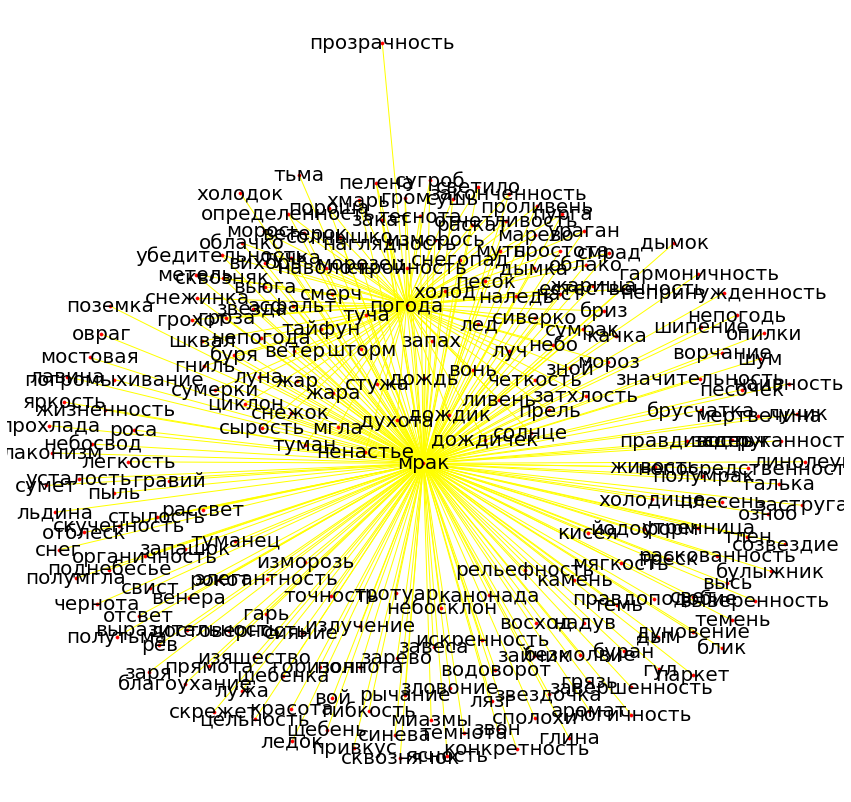

In [434]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') 

# для начала надо выбрать способ "укладки" графа. Их много, возьмём для начала такой:
plt.figure(3,figsize=(15,14.5))
pos=nx.spring_layout(word_graph)

nx.draw_networkx_nodes(word_graph, pos, node_color='red', node_size=10) 
nx.draw_networkx_edges(word_graph, pos, edge_color='yellow')
nx.draw_networkx_labels(word_graph, pos, font_size=20, font_family='Arial')
plt.axis('off') 
plt.show()